# Default of Credit Card Clients Project

## Project Pipeline
A data science pipeline for the project. 
1. **Introduction & Problem Statement :** A brief introduction of the dataset and modeling problem - Binary classification problem.  
    *Note : Classification vs Regression; Binary vs Multi-class*  
    
2. **Dataset information :** Understand the data and its features - Size of dataset, Number of features, Type of each features. 
3. **Data Preprocessing :** data preparation, data transformation (scaling, one-hot encoding)
4. **Exploratory Data Analysis (EDA) :** Summary statistics, data visualizations, assessment metrics (e.g. imbalanced data)  
    *Note : oversampling or stratified sampling might be needed to balance out the data.* 

5. **Train-Test Split :** Split the data into train and test datasets with ratio of train : test = 4 : 1. Avoid leaking of information from train to test. Not touching the test data until the prediction phase (final stage of modeling).
6. **Feature Selection :** Correlation plot, forward/backward stepwise feature selection 
7. **Model Selection :** Fit training dataset to model and predict on test dataset. Models to consider include : baseline model, Linear models (LogisticRegression), Non-linear models (SVM, RandomForest, Boosting), Deep learning model (Neural Network)  
    *Note : Consider having hyperparameter tuning with GridSearch in modeling phase.*  
    *Note : Check for overfitting and underfitting.*  
    
8. **Model Evaluation :** Performance evaluation of each model with evaluation metrics - Confusion matrix, Classification Accuracy (balanced data) / Average Class Accuracy (if imbalanced data), Precision, Recall, F1-score, ROC curve & AUC, K-S statistics, Gain and Lift 
9. **Conclusion & Further Improvements :** Summary of results (highlights of each step in pipeline), discussion of techniques used, insights and limitations of model / project 
10. **References** 

## Import Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 1. Introduction

## 2. Dataset Information

**Source of Dataset**  
UCI Machine Learning Repository : [Default of Credit Card Clients Dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)  
It contains payment information of 30,000 credit card holders obtained from a bank in Taiwan. Each data sample is described by 23 feature attributes (columns B to X). The target feature (column Y) to be predicted is binary valued 0 (= not default) or 1 (= default).

**Dataset Information**  
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

**`ID` :** ID of each client  
**`LIMIT_BAL` :** Amount of given credit in NT dollars (includes individual and family/supplementary credit  
**`SEX` :** Gender (1=male, 2=female)  
**`EDUCATION` :** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
**`MARRIAGE` :** Marital status (1=married, 2=single, 3=others)  
**`AGE` :** Age in years  
**`PAY_0` :** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
**`PAY_2` :** Repayment status in August, 2005 (scale same as above)  
**`PAY_3` :** Repayment status in July, 2005 (scale same as above)  
**`PAY_4` :** Repayment status in June, 2005 (scale same as above)  
**`PAY_5` :** Repayment status in May, 2005 (scale same as above)  
**`PAY_6` :** Repayment status in April, 2005 (scale same as above)  
**`BILL_AMT1` :** Amount of bill statement in September, 2005 (NT dollar)  
**`BILL_AMT2` :** Amount of bill statement in August, 2005 (NT dollar)  
**`BILL_AMT3` :** Amount of bill statement in July, 2005 (NT dollar)  
**`BILL_AMT4` :** Amount of bill statement in June, 2005 (NT dollar)  
**`BILL_AMT5` :** Amount of bill statement in May, 2005 (NT dollar)  
**`BILL_AMT6` :** Amount of bill statement in April, 2005 (NT dollar)  
**`PAY_AMT1` :** Amount of previous payment in September, 2005 (NT dollar)  
**`PAY_AMT2` :** Amount of previous payment in August, 2005 (NT dollar)  
**`PAY_AMT3` :** Amount of previous payment in July, 2005 (NT dollar)  
**`PAY_AMT4` :** Amount of previous payment in June, 2005 (NT dollar)  
**`PAY_AMT5` :** Amount of previous payment in May, 2005 (NT dollar)  
**`PAY_AMT6` :** Amount of previous payment in April, 2005 (NT dollar)  
**`default payment next month` :** Default payment (1=yes, 0=no)  

How to write this section: 
- explain variables by categories 
- last variable `default payment next month` is to be predicted
- binary classification problem : 0 for non-defaulters and 1 for defaulters 
- impact of false negative

In [2]:
# use skiprows=[0] to skip header
data = pd.read_csv("card.csv", skiprows=[0])  
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape  

(30000, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [6]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Some information about the dataset : 
- Dataset has no missing values and all attributes are `int64` datatype. 
- `PAY_0` should be renamed to `PAY_1` to follow other attributes conventions. 
- `default payment next month` should be renamed to `def_pay` to remove space in between. This attribute is our target variable that we are predicting. 
- `EDUCATION` and `MARRIAGE` have undocumented categories in dataset information. 
   - EDUCATION : 0 is an undocumented category. Also, unclear meaning of "unknown" in catgory 5 & 6 of EDUCATION. 
   - MARRIAGE : 0 is an undocumented category.
- `PAY_n`
    - 0 and -2 are an undocumented categories
    - can rescale data to be >= 0

In [7]:
# Summary statistics 
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Summary statistics for dataset : 
- There are 30,000 distinct credit card clients. 
- The average value of credit limit is NTD 16,7484. However, the standard deviation is unusually large with a maximum of NTD 100,0000. 
- Average age is 35.3 years old, with a standard deviation of 1.12
- Education level : 
- Marriage status : 


In [8]:
# count of target classes
data.iloc[:, -1:].value_counts()

default payment next month
0                             23364
1                              6636
dtype: int64

In [9]:
# proportion of target classes
data.iloc[:, -1:].value_counts(normalize=True)

default payment next month
0                             0.7788
1                             0.2212
dtype: float64

The proportion of target classes are 77.88% for non-defaults (`class = 0`) and 22.12% (`class = 1`) for defaults, that means the class of target variable `default payment next month` is **imbalanced**. Most credit card holders will be non-defaulters as they have the ability to pay their bills. However, we care about the defaulters who fail or default to pay their bill.  

We will need to deal with the imbalanced dataset through methods such as oversample, `SMOTE`, resampling, undersampling or stratified sampling *after* splitting the dataset into train and test dataset. We then balance the training dataset only.  
*Note : we can try using the parameter stratify in train_test_split for this* 



## 3. Data Preprocessing
- Data Cleaning 
- Data Transformation 
- Feature Engineering

In [10]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### 3.1 Data Cleaning 

First, we clean the data by renaming some columns and drop the `ID` column. 

In [11]:
data.drop('ID', axis=1, inplace=True)

In [12]:
data = data.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

Next, we transform the values in the following categories : 
- `EDUCATION` : group category 0, 5, 6 as 'others', thus 4. 
- `MARRIAGE` : categorize 0 as 'others', thus 3. 
- `PAY_n` : transform the values to be >= 0. 

### 3.2 Data Transformation

In [13]:
# transform EDUCATION column 
edu_row_update = (data.EDUCATION == 0) | (data.EDUCATION == 5) |(data.EDUCATION == 6) 
data.loc[edu_row_update, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
# transform MARRIAGE column 
marriage_row_update = (data.MARRIAGE == 0)
data.loc[marriage_row_update, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [15]:
# transform pay_n columns 
pay_row_update = (data.PAY_1 == -1) | (data.PAY_1 == -2)
data.loc[pay_row_update,'PAY_1'] = 0

pay_row_update = (data.PAY_2 == -1) | (data.PAY_2 == -2)
data.loc[pay_row_update,'PAY_2'] = 0

pay_row_update = (data.PAY_3 == -1) | (data.PAY_3 == -2)
data.loc[pay_row_update,'PAY_3'] = 0

pay_row_update = (data.PAY_4 == -1) | (data.PAY_4 == -2)
data.loc[pay_row_update,'PAY_4'] = 0

pay_row_update = (data.PAY_5 == -1) | (data.PAY_5 == -2)
data.loc[pay_row_update,'PAY_5'] = 0

pay_row_update = (data.PAY_6 == -1) | (data.PAY_6 == -2)
data.loc[pay_row_update,'PAY_6'] = 0

Now, we have completed a basic cleaning and transformation of our data. However, there are further things to consider. 
- EDUCATION : Should we group category 4 with category 3 as 'high school and below' ? (since 468/30000 = 1.56%) 
- MARRRIAGE : Should we group category 3 with category 2 as 'single' ? (since 377/30000 = 1.26% and marriage status usually only have two that are married and single ?) 

Note : 
- we can perform data cleaning again at a later stage, if necessary, perhaps after EDA.
- one-hot encoding will be done after EDA

### 3.3 Feature Engineering
- new features 
- scaling : min-max scaling, standardization 

*Note : we should only do scaling after train_test_split, we scale the train and test dataset separately.*

In [16]:
# copy a new dataframe for feature engineering
df = data.copy()

After understanding the data, we create a new feature called `OWE_PORTIONn`.   

`OWE_PORTIONn` = (`BILL_AMTn` - `PAY_AMTn`) / `LIMIT_BAL`

**`OWE_PORTIONn` :** The proportion of amount owed to bank over the credit card limit in a given month of 2005 (NT dollar)


In [17]:
df['OWE_PORTION1'] = (df['BILL_AMT1'] - df['PAY_AMT1']) / df['LIMIT_BAL']
df['OWE_PORTION2'] = (df['BILL_AMT2'] - df['PAY_AMT2']) / df['LIMIT_BAL']
df['OWE_PORTION3'] = (df['BILL_AMT3'] - df['PAY_AMT3']) / df['LIMIT_BAL']
df['OWE_PORTION4'] = (df['BILL_AMT4'] - df['PAY_AMT4']) / df['LIMIT_BAL']
df['OWE_PORTION5'] = (df['BILL_AMT5'] - df['PAY_AMT5']) / df['LIMIT_BAL']
df['OWE_PORTION6'] = (df['BILL_AMT6'] - df['PAY_AMT6']) / df['LIMIT_BAL']

- We can take average values for the features `BILL_AMTn`, `PAY_AMTn` and `OWE_PORTIONn`.  
- We take the sum for feature `PAY_n` (if total payment delay is large then its problematic, instead of looking at payment delay by months) 

Definition of new features : 
- **`BILL_AMT_MEAN` :** average of amount of bill statements from April to September 2005 (NT Dollar). 
- **`PAY_AMT_MEAN` :** average of amount of previous payments from April to September 2005 (NT Dollar). 
- **`OWE_PORTION_MEAN` :** average of proportion of amount owed to bank over credit card limit from April to September 2005 (NT Dollar). 
- **`PAY_DELAY_TOTAL` :** total months for payment delay. 

In [18]:
df['BILL_AMT_MEAN'] = (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + 
                          df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']) / 6

df['PAY_AMT_MEAN'] = (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + 
                          df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) / 6

df['OWE_PORTION_MEAN'] = (df['OWE_PORTION1'] + df['OWE_PORTION2'] + df['OWE_PORTION3'] + 
                          df['OWE_PORTION4'] + df['OWE_PORTION5'] + df['OWE_PORTION6']) / 6

df['PAY_DELAY_TOTAL'] = df['PAY_1'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']

In [19]:
# rearrange the def_pay column (target variable) after adding new features
def_pay_copy = df['def_pay']
df.drop('def_pay', axis=1, inplace=True)
df['def_pay'] = def_pay_copy
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,OWE_PORTION2,OWE_PORTION3,OWE_PORTION4,OWE_PORTION5,OWE_PORTION6,BILL_AMT_MEAN,PAY_AMT_MEAN,OWE_PORTION_MEAN,PAY_DELAY_TOTAL,def_pay
0,20000,2,2,1,24,2,2,0,0,0,...,0.120650,0.034450,0.000000,0.000000,0.000000,1284.000000,114.833333,0.058458,4,1
1,120000,2,2,2,26,0,2,0,0,0,...,0.006042,0.014017,0.018933,0.028792,0.010508,2846.166667,833.333333,0.016774,4,1
2,90000,2,2,2,34,0,0,0,0,0,...,0.139189,0.139544,0.148122,0.154978,0.117211,16942.166667,1836.333333,0.167843,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0.924280,0.961820,0.544280,0.557800,0.570940,38555.666667,1398.000000,0.743153,0,0
4,50000,1,2,1,57,0,0,0,0,0,...,-0.620220,0.516700,0.238800,0.369140,0.369040,18223.166667,9841.500000,0.167633,0,0


In [63]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,OWE_PORTION2,OWE_PORTION3,OWE_PORTION4,OWE_PORTION5,OWE_PORTION6,BILL_AMT_MEAN,PAY_AMT_MEAN,OWE_PORTION_MEAN,PAY_DELAY_TOTAL,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,0.366595,0.353914,0.323900,0.298590,0.283148,44976.945200,5275.232094,0.334139,1.687700,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,0.417067,0.401753,0.377458,0.354582,0.353506,63260.721860,10137.946323,0.341061,3.609322,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-12.809138,-2.882782,-3.875800,-2.530600,-3.013530,-56043.166667,0.000000,-1.309566,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.001820,0.001465,0.001235,0.000000,0.000000,4781.333333,1113.291667,0.004672,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.255427,0.239707,0.208755,0.182995,0.154735,21051.833333,2397.166667,0.236915,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.748467,0.708908,0.629587,0.568680,0.549700,57104.416667,5583.916667,0.637241,2.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,6.198000,10.680675,4.986850,4.928000,3.785550,877313.833333,627344.333333,5.203558,36.000000,1.000000


## 4. Exploratory Data Analysis (EDA)
Initial EDA such as checking for missing values and summary statistics is conducted in **Section 2 - Dataset Information.** In this section, we further explore the data to : 
- discover trends and patterns
- spot anomalies & outliers 

**Data visualization** with graphical representations of data : 
- Bar plot for categorical variables `SEX`, `EDUCATION`, `MARRIAGE`. 
- Histogram for continuous variable `AGE`, `LIMIT_BAL`, `BILL_AMT_MEAN`, `PAY_AMT_MEAN`, `OWE_PORTION_MEAN`, `PAY_DELAY_TOTAL`. 
- Boxplot 

**Things left with this section :**
- rename the group labels with meaningful names (e.g. 1 = male; 2 = female) 
- add text labels to charts
- make the color, font size, bar width and etc. nicer
- trim the x-axis according to the maximum value of column obtained from df.describe()
- consider other type of chart visualizations 

First, let's see the distribution of target classes of `def_pay` with a bar plot visualisation. 

<AxesSubplot:title={'center':'Default Credit Card Clients'}>

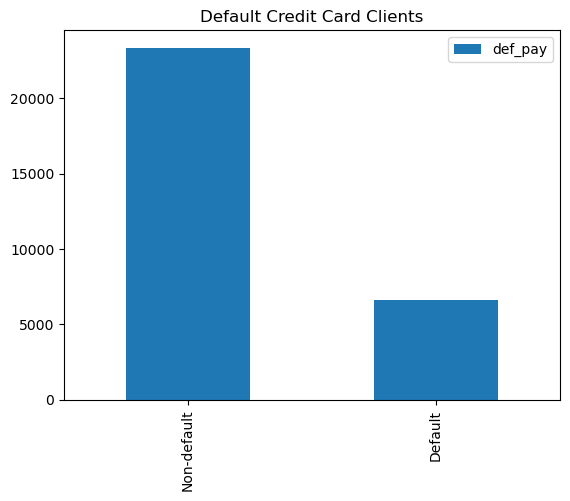

In [41]:
def_pay_df = pd.DataFrame(df['def_pay'].value_counts())
def_pay_df.index = ['Non-default', 'Default']
def_pay_df.plot(kind="bar", title="Default Credit Card Clients")

### 4.1 Bar Plot for Categorical Variables

Text(0, 0.5, 'Frequency')

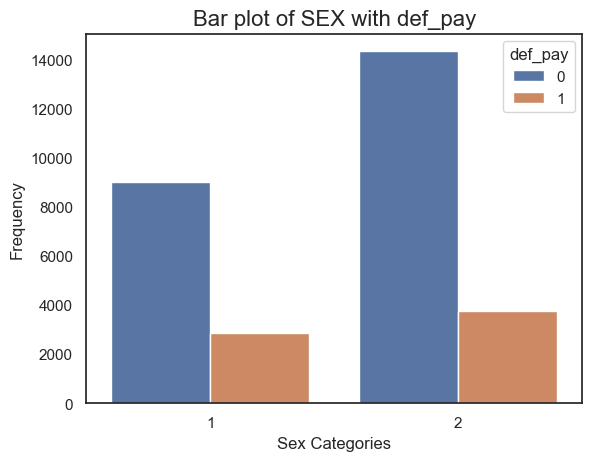

In [58]:
sns.set(style='white')
sns.countplot(data=df, x='SEX', hue='def_pay')

plt.title('Bar plot of SEX with def_pay', fontsize=16)
plt.xlabel('Sex Categories')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

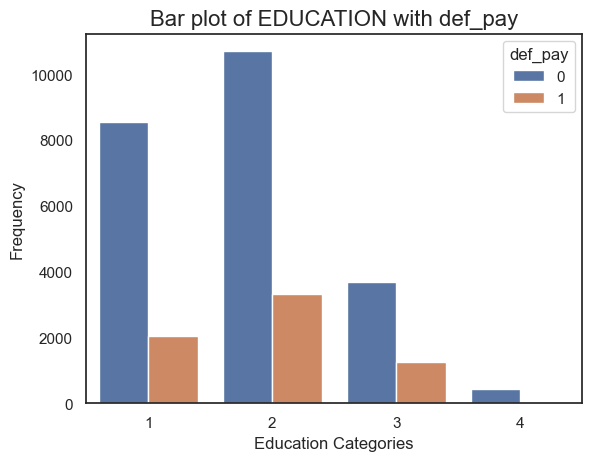

In [57]:
sns.set(style='white')
sns.countplot(data=df, x='EDUCATION', hue='def_pay')

plt.title('Bar plot of EDUCATION with def_pay', fontsize=16)
plt.xlabel('Education Categories')
plt.ylabel('Frequency')

# we can consider combining EDUCATION category 4 (others) to category 3 (high school) since there is 
# no defaulters (def_pay : class 1) in category 4. 

Text(0, 0.5, 'Frequency')

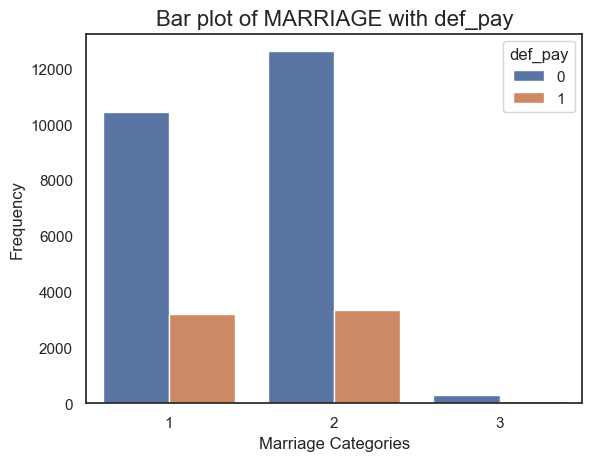

In [56]:
sns.set(style='white')
sns.countplot(data=df, x='MARRIAGE', hue='def_pay')

plt.title('Bar plot of MARRIAGE with def_pay', fontsize=16)
plt.xlabel('Marriage Categories')
plt.ylabel('Frequency')

# we can consider combining MARRIAGE category 3 (others) to category 2 (single) since there is 
# no defaulters (def_pay : class 1) in category 3. 

### 4.2 Histogram for Continuous Variables

Text(0, 0.5, 'Frequency')

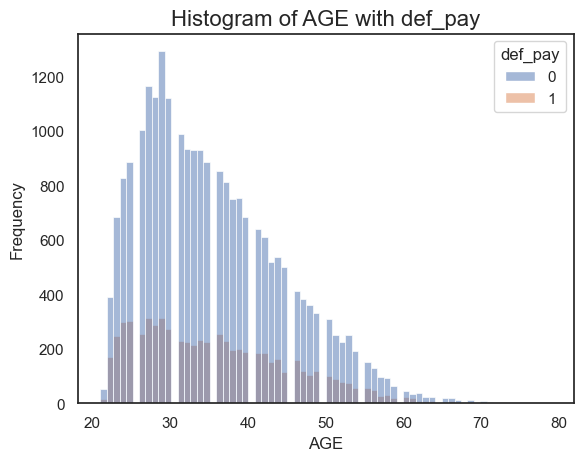

In [59]:
sns.set(style='white')
sns.histplot(data=df, x='AGE', hue='def_pay')

plt.title('Histogram of AGE with def_pay', fontsize=16)
plt.xlabel('AGE')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

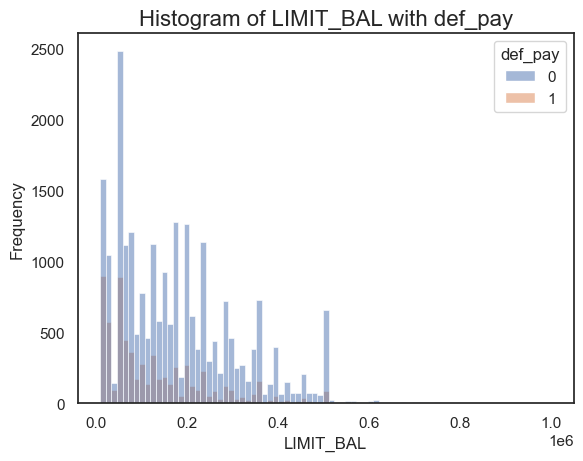

In [60]:
sns.set(style='white')
sns.histplot(data=df, x='LIMIT_BAL', hue='def_pay')

plt.title('Histogram of LIMIT_BAL with def_pay', fontsize=16)
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

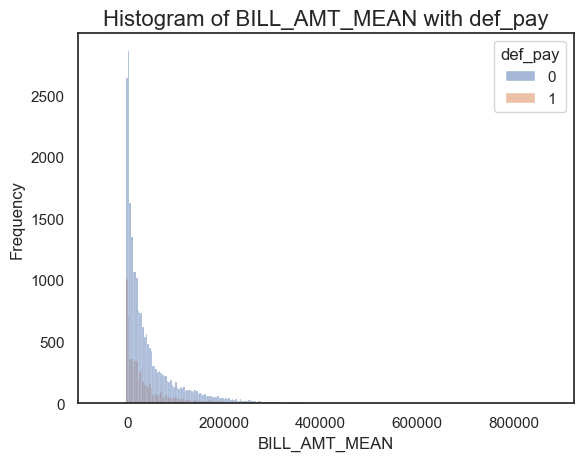

In [61]:
sns.set(style='white')
sns.histplot(data=df, x='BILL_AMT_MEAN', hue='def_pay')

plt.title('Histogram of BILL_AMT_MEAN with def_pay', fontsize=16)
plt.xlabel('BILL_AMT_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

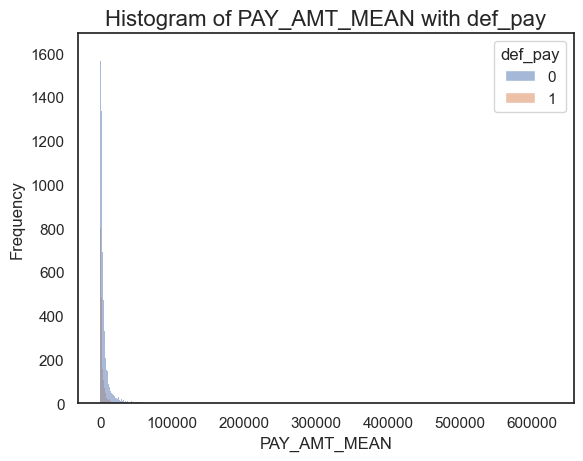

In [62]:
sns.set(style='white')
sns.histplot(data=df, x='PAY_AMT_MEAN', hue='def_pay')

plt.title('Histogram of PAY_AMT_MEAN with def_pay', fontsize=16)
plt.xlabel('PAY_AMT_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

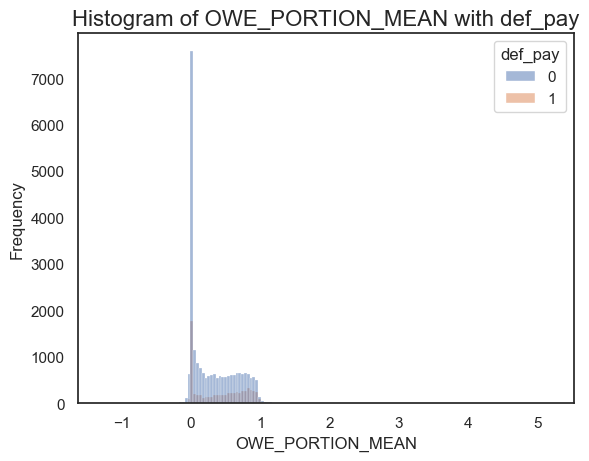

In [64]:
sns.set(style='white')
sns.histplot(data=df, x='OWE_PORTION_MEAN', hue='def_pay')

plt.title('Histogram of OWE_PORTION_MEAN with def_pay', fontsize=16)
plt.xlabel('OWE_PORTION_MEAN')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

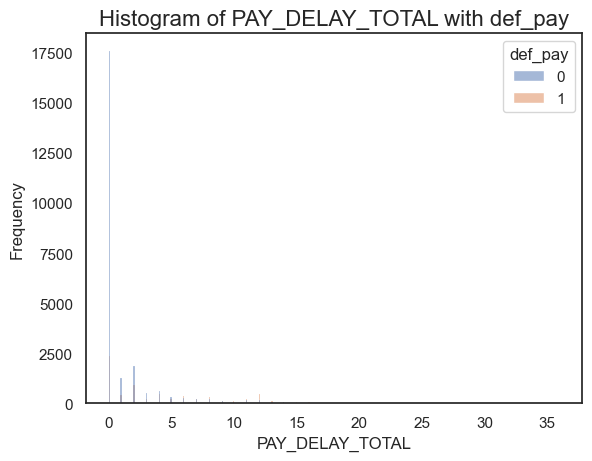

In [67]:
sns.set(style='white')
sns.histplot(data=df, x='PAY_DELAY_TOTAL', hue='def_pay')

plt.title('Histogram of PAY_DELAY_TOTAL with def_pay', fontsize=16)
plt.xlabel('PAY_DELAY_TOTAL')
plt.ylabel('Frequency')

### 4.3 Boxplot for Continuous Variables

The interquartile range (IQR) is defined as the distance between upper and lower quartiles : IQR = Q3 - Q1. Using `pandas` in-build boxplot function, every sample located beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR is considered as an outlier. 

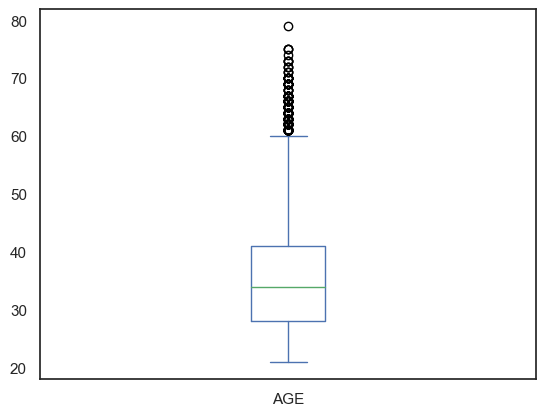

In [68]:
df['AGE'].plot(kind='box')

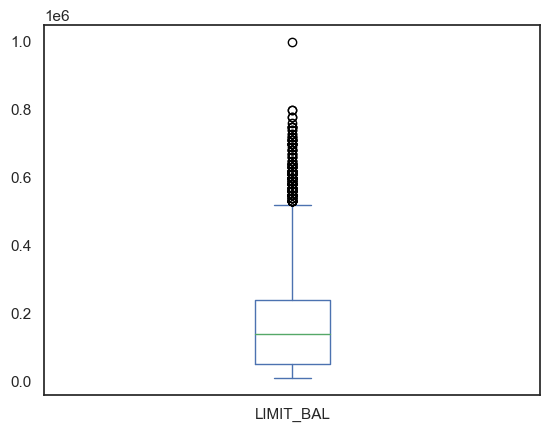

In [69]:
df['LIMIT_BAL'].plot(kind='box')

<AxesSubplot:>

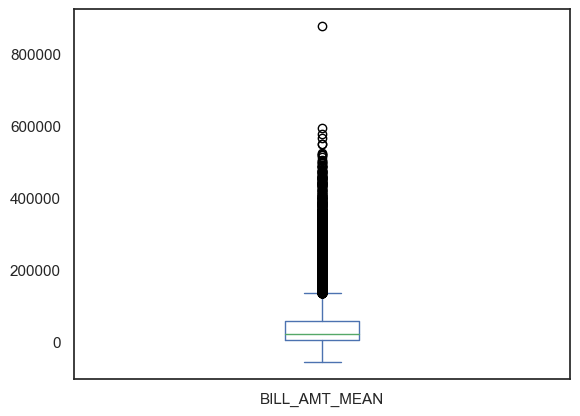

In [70]:
df['BILL_AMT_MEAN'].plot(kind='box')

<AxesSubplot:>

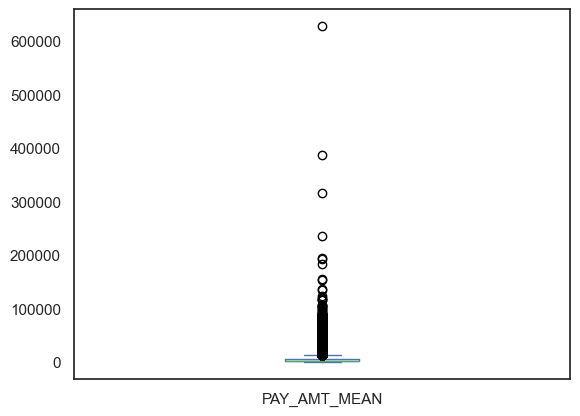

In [71]:
df['PAY_AMT_MEAN'].plot(kind='box')

<AxesSubplot:>

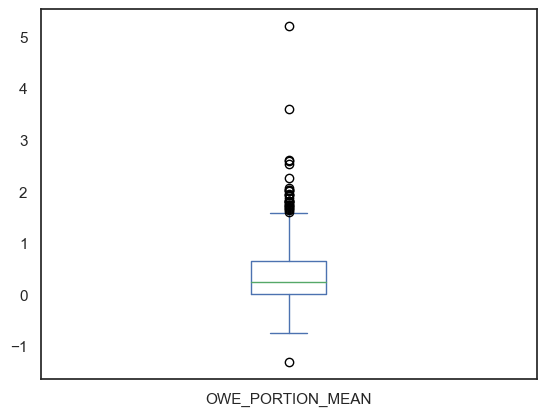

In [73]:
df['OWE_PORTION_MEAN'].plot(kind='box')

<AxesSubplot:>

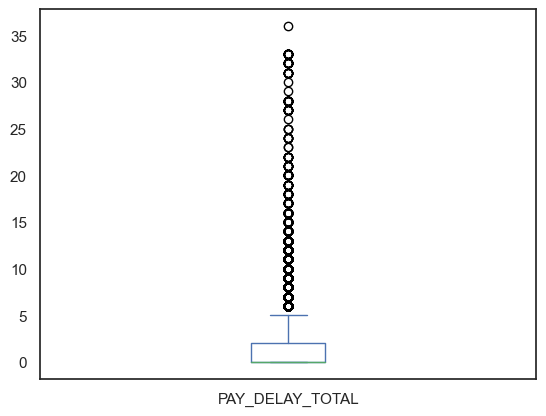

In [72]:
df['PAY_DELAY_TOTAL'].plot(kind='box')